<a href="https://colab.research.google.com/github/oldgreg07/Journey-to-the-Center-of-Python/blob/main/ExploringPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/LearnPythonWithFantasyFootball/master/2022/06-Data%20Munging/01-Fantasy%20Pros%20Projections%20-%20(2022.08.25).csv')

scoring_weights = {
    'receptions': 1, #PPR
    'receiving_yds': 0.1,
    'receiving_td': 6,
    'FL': 2, #fumbles lost
    'rushing_yds': 0.1,
    'rushing_td': 6,
    'passing_yds': 0.04,
    'passing_td': 6,
    'int': -2
}

In [24]:
df['FantasyPoints'] = (
    df['Receptions']*scoring_weights['receptions'] + df['ReceivingYds']*scoring_weights['receiving_yds'] + \
    df['ReceivingTD']*scoring_weights['receiving_td'] + df['FL']*scoring_weights['FL'] + \
    df['RushingYds']*scoring_weights['rushing_yds'] + df['RushingTD']*scoring_weights['rushing_td'] + \
    df['PassingYds']*scoring_weights['passing_yds'] + df['PassingTD']*scoring_weights['passing_td'] + \
    df['Int']*scoring_weights['int'] )

In [26]:
df.head()
#scroll all the way to the right to see that the "Fantasy Points" column has been added.

,Player,Team,Pos,RushingAtt,RushingYds,RushingTD,Receptions,ReceivingYds,ReceivingTD,FL,...,FumblesRecovered,FumblesForced,DefensiveTDs,SafetysForced,PointsAllowed,YardsAgainst,FieldGoalsMade,FieldGoalsAttempted,ExtraPointsMade,FantasyPoints
0,Jonathan Taylor,IND,RB,325.4,1600.1,14.8,42.5,354.3,2.0,2.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,343.34
1,Derrick Henry,TEN,RB,366.2,1640.1,13.0,27.4,216.0,0.9,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300.41
2,Austin Ekeler,LAC,RB,221.1,984.0,9.4,74.5,665.0,5.3,1.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,330.60
3,Christian McCaffrey,CAR,RB,237.4,1057.4,7.6,88.9,757.9,4.1,1.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,343.43
4,Joe Mixon,CIN,RB,287.4,1204.2,9.8,47.1,341.9,2.6,1.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,279.31


In [28]:
rb_df = df.loc[df['Pos'] == 'RB']

rb_df.head()

,Player,Team,Pos,RushingAtt,RushingYds,RushingTD,Receptions,ReceivingYds,ReceivingTD,FL,...,FumblesRecovered,FumblesForced,DefensiveTDs,SafetysForced,PointsAllowed,YardsAgainst,FieldGoalsMade,FieldGoalsAttempted,ExtraPointsMade,FantasyPoints
0,Jonathan Taylor,IND,RB,325.4,1600.1,14.8,42.5,354.3,2.0,2.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,343.34
1,Derrick Henry,TEN,RB,366.2,1640.1,13.0,27.4,216.0,0.9,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300.41
2,Austin Ekeler,LAC,RB,221.1,984.0,9.4,74.5,665.0,5.3,1.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,330.60
3,Christian McCaffrey,CAR,RB,237.4,1057.4,7.6,88.9,757.9,4.1,1.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,343.43
4,Joe Mixon,CIN,RB,287.4,1204.2,9.8,47.1,341.9,2.6,1.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,279.31


In [30]:
base_columns = ['Player', 'Team', 'Pos']
rushing_columns = ['FantasyPoints', 'Receptions', 'ReceivingYds', 'ReceivingTD', 'RushingAtt', 'RushingYds', 'RushingTD', 'FL']

rb_df = df.loc[(df['Pos'] == 'RB', base_columns + rushing_columns)]

rb_df.head()

,Player,Team,Pos,FantasyPoints,Receptions,ReceivingYds,ReceivingTD,RushingAtt,RushingYds,RushingTD,FL
0,Jonathan Taylor,IND,RB,343.34,42.5,354.3,2.0,325.4,1600.1,14.8,2.3
1,Derrick Henry,TEN,RB,300.41,27.4,216.0,0.9,366.2,1640.1,13.0,2.0
2,Austin Ekeler,LAC,RB,330.60,74.5,665.0,5.3,221.1,984.0,9.4,1.5
3,Christian McCaffrey,CAR,RB,343.43,88.9,757.9,4.1,237.4,1057.4,7.6,1.4
4,Joe Mixon,CIN,RB,279.31,47.1,341.9,2.6,287.4,1204.2,9.8,1.6


In [32]:
# sort RBs by RushingYds in descending order and get us back the top 15 rows.
rb_df.sort_values(by='RushingYds', ascending=False).head(15)

,Player,Team,Pos,FantasyPoints,Receptions,ReceivingYds,ReceivingTD,RushingAtt,RushingYds,RushingTD,FL
1,Derrick Henry,TEN,RB,300.41,27.4,216.0,0.9,366.2,1640.1,13.0,2.0
0,Jonathan Taylor,IND,RB,343.34,42.5,354.3,2.0,325.4,1600.1,14.8,2.3
5,Dalvin Cook,MIN,RB,275.29,44.9,334.1,1.5,276.2,1241.8,9.8,2.5
10,Nick Chubb,CLE,RB,228.52,25.3,206.2,1.0,247.6,1230.0,8.4,1.6
4,Joe Mixon,CIN,RB,279.31,47.1,341.9,2.6,287.4,1204.2,9.8,1.6
7,Najee Harris,PIT,RB,280.74,60.7,397.3,2.1,298.3,1183.1,7.7,1.6
3,Christian McCaffrey,CAR,RB,343.43,88.9,757.9,4.1,237.4,1057.4,7.6,1.4
23,Miles Sanders,PHI,RB,201.66,31.2,221.2,1.1,204.4,1043.4,5.7,1.6
20,Elijah Mitchell,SF,RB,202.22,25.8,196.7,1.3,239.0,1027.5,7.3,1.2
13,Saquon Barkley,NYG,RB,258.29,57.4,423.7,2.2,244.9,1027.2,6.6,1.5


In [34]:
# get us back descriptive stats about our rb_df and transpose the DataFrame.
rb_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
FantasyPoints,170.0,81.886059,88.763591,0.0,15.690,40.365,127.720,343.43
Receptions,170.0,16.382353,17.428021,0.0,3.925,8.750,25.375,88.90
ReceivingYds,170.0,126.287647,138.582555,0.0,28.900,65.900,194.850,757.90
ReceivingTD,170.0,0.690000,0.881140,0.0,0.100,0.300,1.000,5.30
RushingAtt,170.0,74.400588,86.359652,0.0,8.125,27.200,130.100,366.20
RushingYds,170.0,327.455294,378.814536,0.0,46.425,142.850,546.500,1640.10
RushingTD,170.0,2.470588,3.014907,0.0,0.325,0.950,3.750,14.80
FL,170.0,0.582941,0.667595,0.0,0.000,0.200,1.000,3.30


In [36]:
rb_df['RushingTDRank'] = rb_df['RushingTD'].rank(ascending=False)

rb_df.sort_values(by='RushingTDRank').head(5)

,Player,Team,Pos,FantasyPoints,Receptions,ReceivingYds,ReceivingTD,RushingAtt,RushingYds,RushingTD,FL,RushingTDRank
0,Jonathan Taylor,IND,RB,343.34,42.5,354.3,2.0,325.4,1600.1,14.8,2.3,1.0
1,Derrick Henry,TEN,RB,300.41,27.4,216.0,0.9,366.2,1640.1,13.0,2.0,2.0
9,James Conner,ARI,RB,251.46,44.1,358.5,2.3,226.4,927.1,10.3,1.6,3.0
21,Damien Harris,NE,RB,195.80,18.2,136.0,0.5,214.8,976.0,10.1,1.4,4.0
4,Joe Mixon,CIN,RB,279.31,47.1,341.9,2.6,287.4,1204.2,9.8,1.6,5.5


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


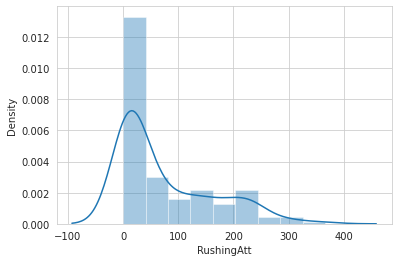

In [38]:
import seaborn as sns
sns.set_style('whitegrid')
sns.distplot(rb_df['RushingAtt']);

In [48]:
adp_df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/LearnPythonWithFantasyFootball/master/2022/06-Data%20Munging/02-ADP%20(PPR)%20-%20(2022.08.23).csv', index_col=0)

adp_df['ADP RANK'] = adp_df['AVG'].rank()

adp_df.head()

,Player,Team,Pos,ESPN,Fantrax,Sleeper,AVG,ADP RANK
Rank,,,,,,,,
1,Jonathan Taylor,IND,RB,1.0,1.0,1.0,1.0,1.0
2,Christian McCaffrey,CAR,RB,2.0,4.0,2.0,3.0,2.5
3,Austin Ekeler,LAC,RB,4.0,2.0,4.0,3.0,2.5
4,Cooper Kupp,LAR,WR,3.0,3.0,5.0,4.2,4.0
5,Derrick Henry,TEN,RB,5.0,6.0,3.0,4.8,5.0


In [54]:
adp_df_cutoff = adp_df[:100]

print(adp_df_cutoff.shape)

replacement_players = {
    'RB': '',
    'QB': '',
    'WR': '',
    'TE': ''
}

for _, row in adp_df_cutoff.iterrows(): 

      position = row['Pos'] # extract out the position and player value from each row as we loop through it
      player = row['Player']   

      if position in replacement_players: # if the position is in the dict's keys
          replacement_players[position] = player # set that player as the replacement player

df = df[['Player', 'Pos', 'Team', 'FantasyPoints']]
df.head()

(100, 8)


,Player,Pos,Team,FantasyPoints
0,Jonathan Taylor,RB,IND,343.34
1,Derrick Henry,RB,TEN,300.41
2,Austin Ekeler,RB,LAC,330.60
3,Christian McCaffrey,RB,CAR,343.43
4,Joe Mixon,RB,CIN,279.31


In [56]:
replacement_values = {}

for position, player_name in replacement_players.items():

    player = df.loc[df['Player'] == player_name]

    replacement_values[position] = player['FantasyPoints'].tolist()[0]

print(replacement_values)

{'RB': 123.85, 'QB': 386.06600000000003, 'WR': 202.22, 'TE': 145.49}


In [58]:
pd.set_option('chained_assignment', None)

df = df.loc[df['Pos'].isin(['QB', 'RB', 'WR', 'TE'])]

df['VOR'] = df.apply(
    lambda row: row['FantasyPoints'] - replacement_values.get(row['Pos']), axis=1

)

df.head()

,Player,Pos,Team,FantasyPoints,VOR
0,Jonathan Taylor,RB,IND,343.34,219.49
1,Derrick Henry,RB,TEN,300.41,176.56
2,Austin Ekeler,RB,LAC,330.60,206.75
3,Christian McCaffrey,RB,CAR,343.43,219.58
4,Joe Mixon,RB,CIN,279.31,155.46


In [60]:
pd.set_option('display.max_rows', None)

df['VOR Rank'] = df['VOR'].rank(ascending=False)
df.sort_values(by='VOR', ascending=False).head(100)

,Player,Pos,Team,FantasyPoints,VOR,VOR Rank
3,Christian McCaffrey,RB,CAR,343.430,219.580,1.0
0,Jonathan Taylor,RB,IND,343.340,219.490,2.0
2,Austin Ekeler,RB,LAC,330.600,206.750,3.0
1,Derrick Henry,RB,TEN,300.410,176.560,4.0
6,Alvin Kamara,RB,NO,284.340,160.490,5.0
170,Cooper Kupp,WR,LAR,361.560,159.340,6.0
7,Najee Harris,RB,PIT,280.740,156.890,7.0
4,Joe Mixon,RB,CIN,279.310,155.460,8.0
5,Dalvin Cook,RB,MIN,275.290,151.440,9.0
8,Leonard Fournette,RB,TB,268.700,144.850,10.0


In [62]:
df['VOR'] = df['VOR'].apply(lambda x: (x - df['VOR'].min()) / (df['VOR'].max() - df['VOR'].min()))

df = df.sort_values(by='VOR Rank')
df.head(100)

,Player,Pos,Team,FantasyPoints,VOR,VOR Rank
3,Christian McCaffrey,RB,CAR,343.430,1.000000,1.0
0,Jonathan Taylor,RB,IND,343.340,0.999851,2.0
2,Austin Ekeler,RB,LAC,330.600,0.978816,3.0
1,Derrick Henry,RB,TEN,300.410,0.928968,4.0
6,Alvin Kamara,RB,NO,284.340,0.902435,5.0
170,Cooper Kupp,WR,LAR,361.560,0.900536,6.0
7,Najee Harris,RB,PIT,280.740,0.896491,7.0
4,Joe Mixon,RB,CIN,279.310,0.894130,8.0
5,Dalvin Cook,RB,MIN,275.290,0.887492,9.0
8,Leonard Fournette,RB,TB,268.700,0.876611,10.0


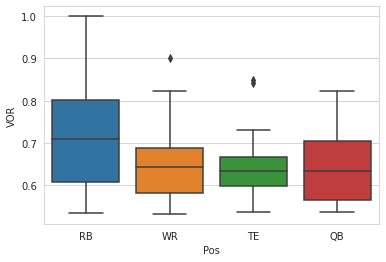

In [64]:
import seaborn as sns

num_teams = 12
num_spots = 16 # 1 QB, 2 RB, 2 WR, 1 TE, 2 FLEX, 1 K, 1 DST, 6 BENCH
draft_pool = num_teams *num_spots

df_copy = df[:draft_pool]

sns.boxplot(x=df_copy['Pos'], y=df_copy['VOR']);

In [66]:
df = df.rename({
    'VOR': 'Value',
    'VOR Rank': 'Value Rank'
}, axis=1)

In [68]:
adp_df = adp_df.rename({
    'PLAYER': 'Player',
    'POS': 'Pos',
    'AVG': 'Average ADP',
    'ADP RANK': 'ADP Rank'
}, axis=1)

In [70]:
final_df = df.merge(adp_df, how='left', on=['Player', 'Pos', 'Team'])

final_df.head()

,Player,Pos,Team,FantasyPoints,Value,Value Rank,ESPN,Fantrax,Sleeper,Average ADP,ADP Rank
0,Christian McCaffrey,RB,CAR,343.43,1.000000,1.0,2.0,4.0,2.0,3.0,2.5
1,Jonathan Taylor,RB,IND,343.34,0.999851,2.0,1.0,1.0,1.0,1.0,1.0
2,Austin Ekeler,RB,LAC,330.60,0.978816,3.0,4.0,2.0,4.0,3.0,2.5
3,Derrick Henry,RB,TEN,300.41,0.928968,4.0,5.0,6.0,3.0,4.8,5.0
4,Alvin Kamara,RB,NO,284.34,0.902435,5.0,11.0,20.0,18.0,16.0,15.0


In [72]:
final_df['Diff in ADP and Value'] = final_df['ADP Rank'] - final_df['Value Rank']
final_df.head()

#a positive diff in ADP and Value denotes a player who is likely being undervalued and could be a bargain relative to their draft spot.

,Player,Pos,Team,FantasyPoints,Value,Value Rank,ESPN,Fantrax,Sleeper,Average ADP,ADP Rank,Diff in ADP and Value
0,Christian McCaffrey,RB,CAR,343.43,1.000000,1.0,2.0,4.0,2.0,3.0,2.5,1.5
1,Jonathan Taylor,RB,IND,343.34,0.999851,2.0,1.0,1.0,1.0,1.0,1.0,-1.0
2,Austin Ekeler,RB,LAC,330.60,0.978816,3.0,4.0,2.0,4.0,3.0,2.5,-0.5
3,Derrick Henry,RB,TEN,300.41,0.928968,4.0,5.0,6.0,3.0,4.8,5.0,1.0
4,Alvin Kamara,RB,NO,284.34,0.902435,5.0,11.0,20.0,18.0,16.0,15.0,10.0


In [74]:
draft_pool = final_df.sort_values(by='ADP Rank')[:196]


rb_draft_pool = draft_pool.loc[draft_pool['Pos'] == 'RB']
qb_draft_pool = draft_pool.loc[draft_pool['Pos'] == 'QB']
wr_draft_pool = draft_pool.loc[draft_pool['Pos'] == 'WR']
te_draft_pool = draft_pool.loc[draft_pool['Pos'] == 'TE']

#Top 10 RB sleepers for the 2022 fantasy draft
rb_draft_pool.sort_values(by='Diff in ADP and Value', ascending=False)[:10]

,Player,Pos,Team,FantasyPoints,Value,Value Rank,ESPN,Fantrax,Sleeper,Average ADP,ADP Rank,Diff in ADP and Value
143,Zamir White,RB,LV,90.22,0.581917,144.0,NaN,212.0,203.0,218.8,228.0,84.0
83,Brian Robinson Jr.,RB,WAS,134.56,0.655129,84.0,178.0,94.0,164.0,164.8,159.0,75.0
121,Mark Ingram II,RB,NO,109.79,0.614230,122.0,212.0,193.0,176.0,187.2,190.0,68.0
100,Kenneth Gainwell,RB,PHI,127.36,0.643240,101.0,196.0,136.0,162.0,162.2,157.0,56.0
48,Rhamondre Stevenson,RB,NE,177.24,0.725599,49.0,98.0,95.0,105.0,108.2,103.0,54.0
144,Gus Edwards,RB,BAL,90.16,0.581818,145.0,NaN,160.0,207.0,195.3,196.0,51.0
132,Tyler Allgeier,RB,ATL,103.66,0.604109,133.0,203.0,155.0,160.0,185.0,184.0,51.0
112,Jamaal Williams,RB,DET,119.78,0.630725,113.0,167.0,154.0,188.0,165.4,161.0,48.0
36,Tony Pollard,RB,DAL,193.64,0.752677,37.0,91.0,86.0,85.0,83.6,84.5,47.5
119,Marlon Mack,RB,HOU,112.42,0.618573,120.0,168.0,194.0,169.0,168.4,166.0,46.0


In [76]:
# top 10 RB overvalued for this year's draft
rb_draft_pool.sort_values(by='Diff in ADP and Value', ascending=True)[:10]

,Player,Pos,Team,FantasyPoints,Value,Value Rank,ESPN,Fantrax,Sleeper,Average ADP,ADP Rank,Diff in ADP and Value
189,Ronald Jones II,RB,KC,61.79,0.534976,190.0,NaN,121.0,154.0,143.5,135.0,-55.0
250,Myles Gaskin,RB,MIA,30.25,0.482899,251.0,NaN,216.0,274.0,218.5,227.0,-24.0
106,Ken Walker III,RB,SEA,123.85,0.637445,107.5,121.0,89.0,80.0,105.6,100.0,-7.5
21,Nick Chubb,RB,CLE,228.52,0.810269,22.0,26.0,17.0,15.0,18.2,17.0,-5.0
1,Jonathan Taylor,RB,IND,343.34,0.999851,2.0,1.0,1.0,1.0,1.0,1.0,-1.0
8,Dalvin Cook,RB,MIN,275.29,0.887492,9.0,9.0,8.0,7.0,7.8,8.0,-1.0
2,Austin Ekeler,RB,LAC,330.60,0.978816,3.0,4.0,2.0,4.0,3.0,2.5,-0.5
194,Tyrion Davis-Price,RB,SF,58.42,0.529412,195.0,NaN,200.0,201.0,193.7,195.0,0.0
6,Najee Harris,RB,PIT,280.74,0.896491,7.0,8.0,7.0,9.0,7.6,7.0,0.0
3,Derrick Henry,RB,TEN,300.41,0.928968,4.0,5.0,6.0,3.0,4.8,5.0,1.0


In [78]:
# top 10 WR sleepers for this year's draft. Hindsight is 2020, but all of these proved to be incorrect. None of these players had more than a handful of worthwhile games, at best.
wr_draft_pool.sort_values(by='Diff in ADP and Value', ascending=False)[:10]

,Player,Pos,Team,FantasyPoints,Value,Value Rank,ESPN,Fantrax,Sleeper,Average ADP,ADP Rank,Diff in ADP and Value
160,Robbie Anderson,WR,CAR,157.88,0.564234,161.0,163.0,175.0,218.0,197.6,199.0,38.0
165,Marvin Jones Jr.,WR,JAC,153.14,0.556408,166.0,162.0,167.0,231.0,206.0,204.0,38.0
193,Nico Collins,WR,HOU,137.43,0.530468,194.0,223.0,248.0,197.0,213.8,216.0,22.0
140,Mecole Hardman,WR,KC,170.24,0.584642,141.0,164.0,149.0,179.0,160.8,154.0,13.0
187,Corey Davis,WR,NYJ,140.54,0.535603,188.0,NaN,156.0,239.0,198.8,200.0,12.0
201,K.J. Osborn,WR,MIN,132.47,0.522279,202.0,NaN,188.0,199.0,211.8,212.0,10.0
136,Jakobi Meyers,WR,NE,179.21,0.599452,137.0,128.0,137.0,165.0,150.8,141.0,4.0
190,Jalen Tolbert,WR,DAL,139.13,0.533275,191.0,180.0,186.0,174.0,192.2,194.0,3.0
72,Michael Thomas,WR,NO,224.93,0.674942,73.0,63.0,75.0,64.0,77.0,75.0,2.0
152,Kenny Golladay,WR,NYG,163.74,0.573910,153.0,135.0,127.0,168.0,160.8,154.0,1.0


In [80]:
# top 10 WR overvalued for this year's draft. This list was absolutely, spot on.
wr_draft_pool.sort_values(by='Diff in ADP and Value', ascending=True)[:10]

,Player,Pos,Team,FantasyPoints,Value,Value Rank,ESPN,Fantrax,Sleeper,Average ADP,ADP Rank,Diff in ADP and Value
311,Romeo Doubs,WR,GB,93.20,0.457439,312.0,199.0,191.0,182.0,192.0,192.5,-119.5
322,Isaiah McKenzie,WR,BUF,90.57,0.453096,323.0,NaN,210.0,210.0,218.3,226.0,-97.0
260,Christian Watson,WR,GB,106.02,0.478606,261.0,207.0,151.0,145.0,176.8,174.5,-86.5
304,Sammy Watkins,WR,GB,95.25,0.460824,305.0,225.0,192.0,192.0,217.4,225.0,-80.0
264,Jameson Williams,WR,DET,105.12,0.477120,265.0,218.0,147.0,166.0,188.6,191.0,-74.0
301,Wan'Dale Robinson,WR,NYG,95.55,0.461319,302.0,NaN,250.0,212.0,222.3,232.0,-70.0
196,Skyy Moore,WR,KC,135.63,0.527496,197.0,130.0,140.0,113.0,142.8,134.0,-63.0
148,DeAndre Hopkins,WR,ARI,167.74,0.580514,149.0,95.0,105.0,77.0,85.2,86.0,-63.0
170,Chris Olave,WR,NO,150.94,0.552775,171.0,114.0,108.0,101.0,116.2,112.0,-59.0
186,DJ Chark Jr.,WR,DET,140.57,0.535653,187.0,160.0,146.0,177.0,147.0,138.0,-49.0


In [82]:
# top 10 TE sleepers for this year's draft
te_draft_pool.sort_values(by='Diff in ADP and Value', ascending=False)[:10]

,Player,Pos,Team,FantasyPoints,Value,Value Rank,ESPN,Fantrax,Sleeper,Average ADP,ADP Rank,Diff in ADP and Value
130,Austin Hooper,TE,TEN,125.47,0.604389,131.0,195.0,235.0,200.0,212.0,213.0,82.0
149,Hayden Hurst,TE,CIN,110.97,0.580448,150.0,183.0,286.0,198.0,221.0,231.0,81.0
102,Tyler Higbee,TE,LAR,147.75,0.641177,103.0,149.0,281.0,148.0,182.8,183.0,80.0
114,Gerald Everett,TE,LAC,140.49,0.629189,115.0,216.0,177.0,191.0,185.2,185.0,70.0
96,Noah Fant,TE,SEA,150.20,0.645222,97.0,146.0,198.0,170.0,160.8,154.0,57.0
125,Evan Engram,TE,JAC,128.65,0.609640,126.0,188.0,164.0,205.0,182.2,182.0,56.0
93,Hunter Henry,TE,NE,151.85,0.647946,94.0,124.0,249.0,144.0,154.2,146.0,52.0
182,Cameron Brate,TE,TB,84.85,0.537320,183.0,NaN,208.0,221.0,219.8,230.0,47.0
133,Robert Tonyan,TE,GB,124.96,0.603547,134.0,206.0,171.0,193.0,179.0,179.0,45.0
116,David Njoku,TE,CLE,140.11,0.628562,117.0,156.0,157.0,171.0,165.8,162.0,45.0


In [83]:
# top 10 TE overvalued for this year's draft
te_draft_pool.sort_values(by='Diff in ADP and Value', ascending=True)[:10]

,Player,Pos,Team,FantasyPoints,Value,Value Rank,ESPN,Fantrax,Sleeper,Average ADP,ADP Rank,Diff in ADP and Value
54,George Kittle,TE,SF,191.71,0.713760,55.0,43.0,47.0,36.0,41.6,39.0,-16.0
45,Kyle Pitts,TE,ATL,202.09,0.730899,46.0,34.0,34.0,30.0,33.8,33.0,-13.0
107,Dawson Knox,TE,BUF,145.49,0.637445,107.5,115.0,111.0,89.0,98.8,96.0,-11.5
71,T.J. Hockenson,TE,DET,168.43,0.675322,72.0,64.0,71.0,61.0,66.8,64.0,-8.0
13,Travis Kelce,TE,KC,274.15,0.849879,14.0,17.0,13.0,13.0,14.4,13.0,-1.0
43,Darren Waller,TE,LV,202.22,0.731114,44.0,42.0,49.0,40.0,44.6,44.0,0.0
51,Dalton Schultz,TE,DAL,195.45,0.719935,52.0,57.0,67.0,56.0,60.0,56.0,4.0
68,Dallas Goedert,TE,PHI,173.95,0.684436,69.0,79.0,87.0,74.0,76.0,73.0,4.0
16,Mark Andrews,TE,BAL,268.66,0.840815,17.0,20.0,21.0,23.0,21.2,22.0,5.0
77,Zach Ertz,TE,ARI,160.61,0.662410,78.0,87.0,96.0,84.0,89.0,90.0,12.0


In [88]:
# top 10 QB sleepers for this year's draft
qb_draft_pool.sort_values(by='Diff in ADP and Value', ascending=False)[:10]

,Player,Pos,Team,FantasyPoints,Value,Value Rank,ESPN,Fantrax,Sleeper,Average ADP,ADP Rank,Diff in ADP and Value
185,Carson Wentz,QB,WAS,324.790,0.536270,186.0,184.0,219.0,240.0,214.0,217.0,31.0
56,Tom Brady,QB,TB,431.230,0.712017,57.0,69.0,90.0,78.0,80.4,78.0,21.0
73,Matthew Stafford,QB,LAR,407.070,0.672125,74.0,93.0,93.0,98.0,90.4,91.0,17.0
151,Ryan Tannehill,QB,TEN,349.320,0.576773,152.0,179.0,141.0,213.0,172.6,169.0,17.0
60,Dak Prescott,QB,DAL,427.090,0.705181,61.0,68.0,78.0,88.0,76.4,74.0,13.0
110,Kirk Cousins,QB,MIN,384.226,0.634407,111.0,126.0,112.0,121.0,121.4,116.5,5.5
17,Josh Allen,QB,BUF,498.474,0.823045,18.0,21.0,26.0,22.0,21.8,23.0,5.0
172,Mac Jones,QB,NE,333.700,0.550982,173.0,173.0,168.0,187.0,178.6,178.0,5.0
162,Matt Ryan,QB,IND,340.618,0.562404,163.0,172.0,165.0,189.0,169.4,168.0,5.0
29,Patrick Mahomes II,QB,KC,467.668,0.772180,30.0,29.0,41.0,32.0,32.4,31.0,1.0


In [89]:
# top 10 QB overvalued for this year's draft
qb_draft_pool.sort_values(by='Diff in ADP and Value', ascending=True)[:10]

,Player,Pos,Team,FantasyPoints,Value,Value Rank,ESPN,Fantrax,Sleeper,Average ADP,ADP Rank,Diff in ADP and Value
590,Deshaun Watson,QB,CLE,152.986,0.252600,591.0,186.0,209.0,173.0,178.2,177.0,-414.0
601,Taysom Hill,QB,NO,20.286,0.033495,602.0,NaN,224.0,220.0,216.5,223.0,-379.0
111,Russell Wilson,QB,DEN,383.554,0.633297,112.0,78.0,83.0,73.0,81.4,80.0,-32.0
159,Justin Fields,QB,CHI,341.834,0.564412,160.0,153.0,122.0,151.0,141.6,133.0,-27.0
74,Joe Burrow,QB,CIN,406.304,0.670861,75.0,72.0,64.0,53.0,62.0,57.0,-18.0
58,Lamar Jackson,QB,BAL,428.330,0.707228,59.0,44.0,53.0,46.0,47.0,47.0,-12.0
215,Baker Mayfield,QB,CAR,309.072,0.510318,216.0,193.0,213.0,211.0,208.8,206.0,-10.0
44,Justin Herbert,QB,LAC,442.738,0.731018,45.0,36.0,43.0,34.0,36.0,35.0,-10.0
115,Derek Carr,QB,LV,380.866,0.628859,116.0,113.0,114.0,111.0,111.8,106.0,-10.0
105,Trey Lance,QB,SF,386.066,0.637445,107.5,101.0,103.0,102.0,102.4,98.0,-9.5


In [90]:
# top 10 QB overvalued for this year's draft
qb_draft_pool.sort_values(by='Diff in ADP and Value', ascending=True)[:10]

,Player,Pos,Team,FantasyPoints,Value,Value Rank,ESPN,Fantrax,Sleeper,Average ADP,ADP Rank,Diff in ADP and Value
590,Deshaun Watson,QB,CLE,152.986,0.252600,591.0,186.0,209.0,173.0,178.2,177.0,-414.0
601,Taysom Hill,QB,NO,20.286,0.033495,602.0,NaN,224.0,220.0,216.5,223.0,-379.0
111,Russell Wilson,QB,DEN,383.554,0.633297,112.0,78.0,83.0,73.0,81.4,80.0,-32.0
159,Justin Fields,QB,CHI,341.834,0.564412,160.0,153.0,122.0,151.0,141.6,133.0,-27.0
74,Joe Burrow,QB,CIN,406.304,0.670861,75.0,72.0,64.0,53.0,62.0,57.0,-18.0
58,Lamar Jackson,QB,BAL,428.330,0.707228,59.0,44.0,53.0,46.0,47.0,47.0,-12.0
215,Baker Mayfield,QB,CAR,309.072,0.510318,216.0,193.0,213.0,211.0,208.8,206.0,-10.0
44,Justin Herbert,QB,LAC,442.738,0.731018,45.0,36.0,43.0,34.0,36.0,35.0,-10.0
115,Derek Carr,QB,LV,380.866,0.628859,116.0,113.0,114.0,111.0,111.8,106.0,-10.0
105,Trey Lance,QB,SF,386.066,0.637445,107.5,101.0,103.0,102.0,102.4,98.0,-9.5
